# Predicting Mental Health Illness

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
%matplotlib inline
os.getcwd()
from sklearn.model_selection import train_test_split
from IPython.display import display 
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import statistics
import copy
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import pickle

In [61]:
#!pip install nbconvert
#!pip install pandoc

In [2]:
df = pd.read_csv('analysis_data_set.csv')
df.head(5)

data = copy.deepcopy(df)

In [3]:
# Get column names
df.columns

Index(['Unnamed: 0', 'age', 'marital_status', 'education_level',
       'number_of_children', 'smoking_status', 'physical_activity_level',
       'employment_status', 'income', 'alcohol_consumption', 'dietary_habits',
       'sleep_patterns', 'history_of_mental_illness',
       'history_of_substance_abuse', 'family_history_of_depression',
       'chronic_medical_conditions', 'agecat', 'incomecat', 'smoking2cat',
       'alcohol.cat'],
      dtype='object')

In [4]:
#drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'agecat', 'incomecat','smoking2cat',
       'alcohol.cat'])

# Data preparation

In [5]:
len(df)

194622

# Target variable

history_of_mental_illnesss: Whether the individual had history or mental health or nots. 1/0

In [6]:
#  check the distribution of values of history of mental health(check for imbalance data set.
# data set is imbalanced, need to do upsampling or downsampling
df['history_of_mental_illness'].value_counts(normalize = True)
# we see, the patient dont have depression

history_of_mental_illness
0    0.69355
1    0.30645
Name: proportion, dtype: float64

In [7]:
df['history_of_mental_illness'].isnull().value_counts()

history_of_mental_illness
False    194622
Name: count, dtype: int64

In [8]:
# identifying categorical and numerical columns

In [9]:
categorical = ['marital_status', 'education_level', 'number_of_children',
       'smoking_status', 'physical_activity_level', 'employment_status',
        'alcohol_consumption', 'dietary_habits', 'sleep_patterns',
        'history_of_substance_abuse',
       'family_history_of_depression', 'chronic_medical_conditions']
numerical = ['age', 'income']

In [10]:
# checking unique values for categorical coluns
df[categorical].nunique()

marital_status                  4
education_level                 5
number_of_children              5
smoking_status                  3
physical_activity_level         3
employment_status               2
alcohol_consumption             3
dietary_habits                  3
sleep_patterns                  3
history_of_substance_abuse      2
family_history_of_depression    2
chronic_medical_conditions      2
dtype: int64

In [11]:
# Feature importance

In [12]:
global_mean = df.history_of_mental_illness.mean()
for col in categorical:                                           
    df_group =df.groupby(by=col).history_of_mental_illness.agg(['mean'])   
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)      

,mean,diff,risk
marital_status,,,
1,0.296875,-0.009575,0.968754
2,0.307479,0.001029,1.003358
3,0.313076,0.006625,1.021620
4,0.293769,-0.012681,0.958620


,mean,diff,risk
education_level,,,
1,0.336842,0.030392,1.099173
2,0.333908,0.027457,1.089598
3,0.279857,-0.026593,0.913222
4,0.281227,-0.025224,0.917690
5,0.283331,-0.023119,0.924559


,mean,diff,risk
number_of_children,,,
0,0.303470,-0.002980,0.990275
1,0.307776,0.001326,1.004326
2,0.308795,0.002345,1.007651
3,0.310667,0.004217,1.013760
4,0.280527,-0.025924,0.915406


,mean,diff,risk
smoking_status,,,
1,0.294124,-0.012326,0.959778
2,0.305988,-0.000462,0.998493
3,0.308440,0.001989,1.006491


,mean,diff,risk
physical_activity_level,,,
1,0.297292,-0.009159,0.970113
2,0.305650,-0.000800,0.997388
3,0.309995,0.003545,1.011567


,mean,diff,risk
employment_status,,,
0,0.393214,0.086764,1.283124
1,0.251027,-0.055423,0.819145


,mean,diff,risk
alcohol_consumption,,,
1,0.302806,-0.003644,0.988109
2,0.304912,-0.001539,0.994979
3,0.314721,0.008270,1.026988


,mean,diff,risk
dietary_habits,,,
0,0.317095,0.010645,1.034736
1,0.306789,0.000338,1.001104
2,0.278883,-0.027567,0.910043


,mean,diff,risk
sleep_patterns,,,
1,0.306414,-0.000037,0.999880
2,0.272418,-0.034032,0.888947
3,0.328327,0.021876,1.071386


,mean,diff,risk
history_of_substance_abuse,,,
0,0.306133,-0.000317,0.998965
1,0.307161,0.000710,1.002318


,mean,diff,risk
family_history_of_depression,,,
0,0.304992,-0.001459,0.995240
1,0.310149,0.003698,1.012068


,mean,diff,risk
chronic_medical_conditions,,,
0,0.304296,-0.002155,0.992969
1,0.310891,0.004440,1.014490


In [13]:
# mutual information
def calculate_mi(series):                                      
    return mutual_info_score(series, df.history_of_mental_illness)     
 
df_mi = df[categorical].apply(calculate_mi)        
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI') 
df_mi

,MI
employment_status,1.117820e-02
education_level,1.773643e-03
sleep_patterns,9.218318e-04
dietary_habits,4.152930e-04
marital_status,7.585078e-05
number_of_children,6.065718e-05
alcohol_consumption,5.454854e-05
physical_activity_level,4.344234e-05
smoking_status,3.831982e-05
chronic_medical_conditions,2.247804e-05


In [14]:
# Correlation coefficient

In [15]:
df[numerical].corrwith(df.history_of_mental_illness)

age       0.02603
income   -0.14563
dtype: float64

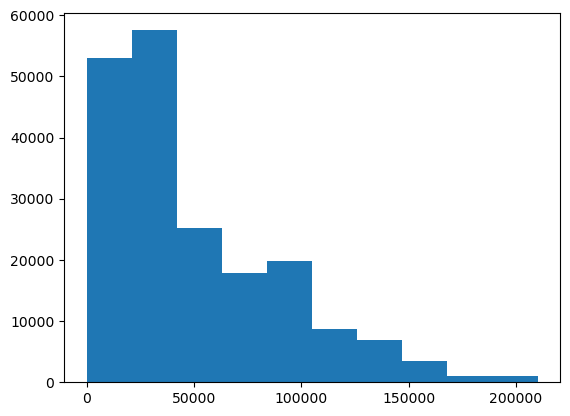

In [16]:
plt.hist(df.income)
plt.show()

In [17]:
df[df.duplicated()]

,age,marital_status,education_level,number_of_children,smoking_status,physical_activity_level,employment_status,income,alcohol_consumption,dietary_habits,sleep_patterns,history_of_mental_illness,history_of_substance_abuse,family_history_of_depression,chronic_medical_conditions


In [18]:
df1 = copy.deepcopy(df)

In [19]:
columns_to_drop = ['marital_status', 'number_of_children',
       'smoking_status', 'physical_activity_level',
        'alcohol_consumption','history_of_substance_abuse',
       'family_history_of_depression', 'chronic_medical_conditions', 'sleep_patterns']

In [20]:
df = df.drop(columns= columns_to_drop)

In [21]:
df.shape

(194622, 6)

# data split

In [22]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
#df.to_csv('df_train_ful.csv')
#df.to_csv('df_test.csv')

In [24]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)             
y_train = df_train.history_of_mental_illness.values   
y_val = df_val.history_of_mental_illness.values       
 
del df_train['history_of_mental_illness']             
del df_val['history_of_mental_illness']    

In [25]:
# Saving the data sets
#df.to_csv('df_train_ful.csv')
#df.to_csv('df_test.csv')
#df.to_csv('df_train.csv')
#df.to_csv('df_val.csv')
#df.to_csv('y_train.csv')
#df.to_csv('y_val.csv')

In [26]:
df.columns

Index(['age', 'education_level', 'employment_status', 'income',
       'dietary_habits', 'history_of_mental_illness'],
      dtype='object')

# feature engineering  and transformation


In [27]:
categorical = ['education_level','employment_status',
        'dietary_habits']
numerical = ['age', 'income']

In [28]:
# scale numerical columns
sc = StandardScaler()
cols_to_scale = df_train[['age','income']].columns.tolist()
cols_to_scale
df_train.loc[:,cols_to_scale] = sc.fit_transform(df_train.loc[:,cols_to_scale])
# encode cat and numerical columns
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [29]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [30]:
X_train = dv.transform(train_dict)

In [31]:
dv.get_feature_names_out()

array(['age', 'dietary_habits', 'education_level', 'employment_status',
       'income'], dtype=object)

# LR Model

handling imbalance data set using SMOTE (Synthetic Minority Oversampling Technique) 

In [32]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model = LogisticRegression(class_weight=dict(enumerate(class_weights)), solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.7217701760212554, 1: 1.6272931486334705},
                   random_state=1, solver='liblinear')

In [33]:
model.intercept_[0]

0.3860048872788328

In [34]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': -0.006,
 'dietary_habits': -0.029,
 'education_level': -0.041,
 'employment_status': -0.468,
 'income': -0.145}

In [35]:
# apply model to validation data set
cols_to_scale =df_val[['age','income']].columns.tolist()
cols_to_scale
df_val.loc[:,cols_to_scale] = sc.fit_transform(df_val.loc[:,cols_to_scale])  

In [36]:
# encode cat and numerical columns
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val =dv.transform(val_dict)  

In [37]:
# estimate propability on validation set
y_pred = model.predict_proba(X_val)

In [38]:
# probabilities of mental health
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.37045341, 0.58422756, 0.61088199, ..., 0.4592978 , 0.47533094,
       0.57376151])

In [39]:
predictions = model.predict(X_val)

#use recal to evaluate model performamnce due to imbalalnce data set

In [40]:
print("Overall Precision:",precision_score(y_val, predictions))
print("Overall Recall:",recall_score(y_val, predictions))
print('Accuracy: ', accuracy_score(y_val, predictions))

Overall Precision: 0.3973158395513045
Overall Recall: 0.5043865225683407
Accuracy:  0.614040209415932


In [41]:
#check accuracy of baseline model to see how well it is peforming compared to the fitted model
size_val = len(y_val)                   
baseline = np.repeat(False, size_val)   

In [42]:
accuracy_score(baseline, y_val)

0.6938557054163991

# Decision Tree Model

In [44]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

dtree = DecisionTreeClassifier(random_state=1, class_weight=class_weights_dict)

# Train the model
dtree.fit(X_train, y_train)
# Make predictions
tree.predictions = dtree.predict(X_val)

In [45]:
print("Overall Precision:",precision_score(y_val, tree.predictions))
print("Overall Recall:",recall_score(y_val, tree.predictions))
print('Accuracy: ', accuracy_score(y_val, tree.predictions))

Overall Precision: 0.32876019472719226
Overall Recall: 0.3305785123966942
Accuracy:  0.5884276288900566


# Random Forest Model

In [46]:
# Step 1: Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
rf.predictions = rf.predict(X_val)
print("Overall Precision:",precision_score(y_val, rf.predictions))
print("Overall Recall:",recall_score(y_val, rf.predictions))
print('Accuracy: ', accuracy_score(y_val, rf.predictions))

Overall Precision: 0.32029017366454166
Overall Recall: 0.5557533375715193
Accuracy:  0.5029290983048208


# Gradient boosting classifier

In [48]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
gb_predictions = gb_model.predict(X_val)

In [49]:
# Make predictions
print("Overall Precision:",precision_score(y_val, gb_predictions))
print("Overall Recall:",recall_score(y_val, gb_predictions))
print('Accuracy: ', accuracy_score(y_val, gb_predictions))

Overall Precision: 0.351044245540532
Overall Recall: 0.7031150667514304
Accuracy:  0.5111811759210603


# Best Model

In [50]:
# Best Model is GBoost with 70% recal
#The fraction of correctly predicted patients with historory of mental health amongst all patients with historty of mental health

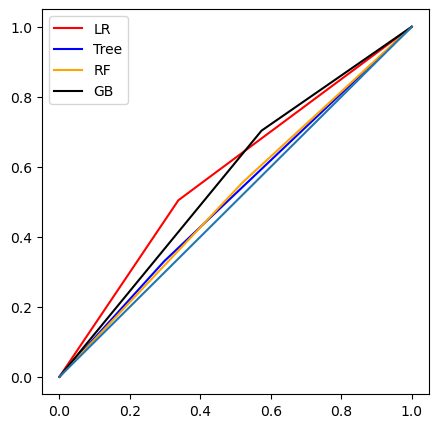

In [51]:
fpr_lr, tpr_lr, _ = roc_curve(y_val, predictions)
fpr_tree, tpr_tree, _ = roc_curve(y_val, tree.predictions)
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf.predictions)
fpr_gb, tpr_gb, _ = roc_curve(y_val, gb_predictions)
 
plt.figure(figsize=(5, 5))
 
plt.plot(fpr_lr, tpr_lr, color='red', label='LR')
plt.plot(fpr_tree, tpr_tree, color='blue', label='Tree')
plt.plot(fpr_rf, tpr_rf, color='orange', label='RF')
plt.plot(fpr_gb, tpr_gb, color='black', label='GB')
plt.plot([0, 1], [0, 1])
plt.legend()

# Fitted model

In [52]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Gradient Boosting model
sgb_model = GradientBoostingClassifier(random_state=42)
sgb_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
sgb_predictions = sgb_model.predict(X_val)

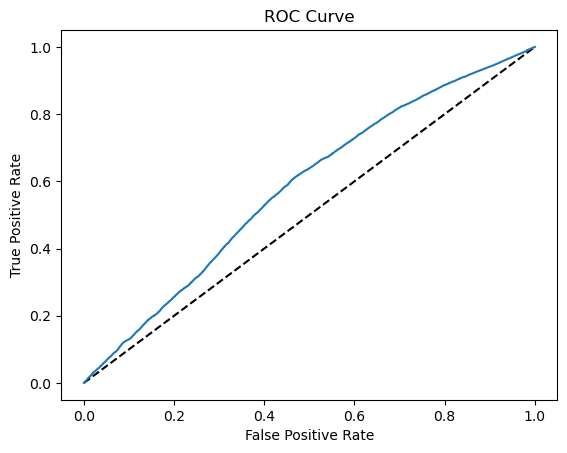

In [53]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = sgb_model.predict_proba(X_val)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# K-fold cross-validation

# serilisation and decerilisation

In [54]:
# serialization & deserialization
with open('MH-Model.bin', 'wb') as f_out: 
    pickle.dump((dv, sgb_model), f_out)   

In [55]:
#deserialization
with open('MH-Model.bin', 'rb') as f_in:    
    dv, sgb_model = pickle.load(f_in)  